# Визуализация работы нейросети

In [1]:
import json
import os.path as osp
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import random

Пути к данным и json файлу, с сохраннеными предсказание нейросети

In [2]:
data_dir = ''
predict_json_path = ''

In [ ]:
with open(predict_json_path) as fout:
    ans = json.load(fout)

In [3]:
class_indices = {}
reverse_index = np.zeros((100), dtype=int)
for _class, index in ans['class_indices'].items():
    class_indices[index] = int(_class)
    reverse_index[index] = int(_class)

In [4]:
file_names = ans['filenames']
predict = ans['predict'][:len(file_names)]
i = random.randint(0, len(file_names) - 1)

statistics = np.empty((len(file_names), 2), dtype=np.int)

for i, (file_name, y_pred_indexes) in enumerate(zip(file_names, predict)):
    y_true = osp.split(file_name)[0]
    y_pred_prob = np.zeros((101), dtype=np.float32)
    y_pred_prob[reverse_index] = y_pred_indexes
    y_pred = np.argmax(y_pred_prob)
    statistics[i, :] = [y_true, y_pred]

In [5]:
uniq, counts = np.unique(statistics[:, 0], return_counts=True)

## Распределение по классам в коллекции

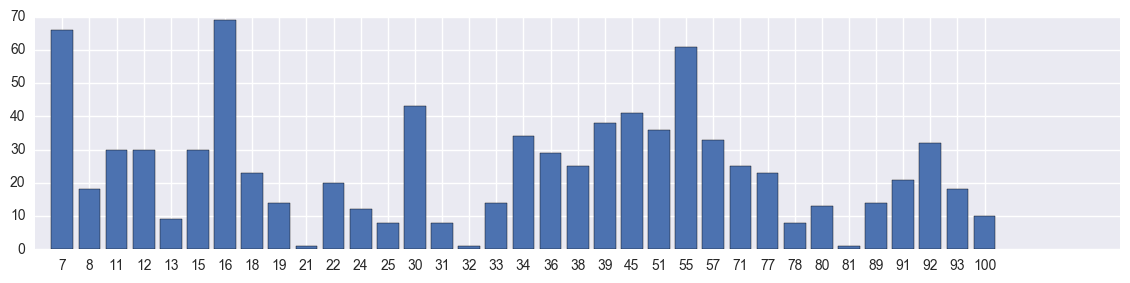

In [21]:
plt.figure(figsize=(14, 3))

plt.bar(list(range(1, counts.shape[0]+1)), counts, align='center')
plt.xticks(list(range(1, counts.shape[0]+1)), uniq, size='small')
plt.show()

## Колличество представленных классов в коллекции

In [23]:
uniq.shape[0]

35

## Точность предказания нейросети по классам

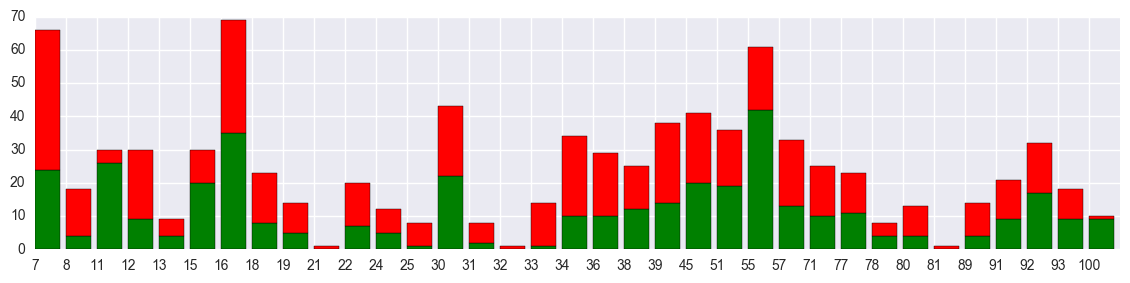

In [8]:
true_count = np.empty(uniq.shape)
false_count = np.empty(uniq.shape)

for i, number in enumerate(uniq):
    ident = statistics[:, 0] == number
    true_count[i] = (statistics[ident, 0] ==  statistics[ident, 1]).sum()
    false_count[i] = (statistics[ident, 0] !=  statistics[ident, 1]).sum()

plt.figure(figsize=(14, 3))

xs = list(range(0, uniq.shape[0]))

p1 = plt.bar(xs, true_count, color='g',)
p2 = plt.bar(xs, false_count, bottom=true_count,color='r')

plt.xticks(list(range(0, counts.shape[0])), uniq, size='small')
plt.show()

## Примеры предсказаний для конкретной метки

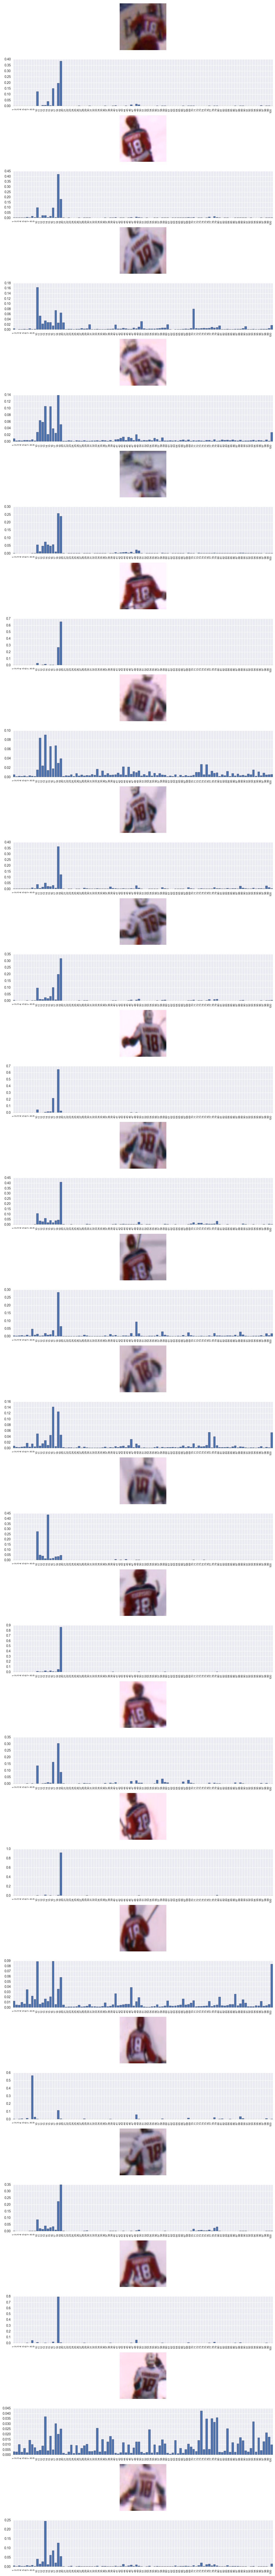

In [13]:
number = 18

count = counts[uniq==number][0]

file_names = ans['filenames']
predict = ans['predict'][:len(file_names)]


plt.figure(figsize=(14, 2 * (3 * count)))
i = 0
for (file_name, y_pred_indexes) in zip(file_names, predict):
    y_true = int(osp.split(file_name)[0])
    if y_true != number:
        continue
    y_pred_prob = np.zeros((101), dtype=np.float32)
    y_pred_prob[reverse_index] = y_pred_indexes
    y_pred = np.argmax(y_pred_prob)
    #statistics[i, :] = [y_true, y_pred]    

    #print("Y_TRUE: {}\nY_PRED: {}".format(y_true, y_pred))
    img = scipy.misc.imread(osp.join(data_dir, file_name))
    img = scipy.misc.imresize(img, (50, 50))
    plt.subplot(2 * count, 1, i + 1)
    plt.imshow(img), plt.axis('off')
    
    
    plt.subplot(2 * count, 1, i + 2)
    plt.xticks(list(range(1, 101)), rotation=90, size='x-small')
    plt.bar(list(range(1, 101)), y_pred_prob[1:])#, hue=range(1, 101))
    i += 2

plt.show()